In This section we are loading dataset

In [2]:
!pip uninstall scikit-learn

In [ ]:
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#1 Get the data

In [ ]:
#1 Get the data
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

#2. Frame the problem
The dataset includes following feature columns:
age (in years), sex, bmi (body mass index), bp (blood pressure), s1 (total serum cholestrol), s2 (low-density lipoproteins), s3(high-density lipoproteins), s4( total cholesterol / HDL), s5 (possibly log of serum triglycerides level), s6 (blood sugar level)

 source:https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

and a traget column (Target Column is a quantitative measure of disease progression one year after baseline).

Our objective is to create a prediction model which can predict measure of disease progression




In [ ]:
diabetes = datasets.load_diabetes()
x, y = diabetes.data, diabetes.target

#3. EDA

In [ ]:
print(type(x))
print(type(y))
#Both features columns and target columns are numpy.ndarray object

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(len(x))
print(len(y))
#total samples = 442

442
442


In [ ]:
print(x.shape)
print(y.shape)
#Feature size is 442*10, Target size is 442*1

(442, 10)
(442,)


In [ ]:
categories = diabetes.feature_names
print(categories)
#categories are listed below

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
print(x.dtype)
#data type of categories

float64


In [ ]:
#we will use numpy for stats

In [ ]:
import numpy as np
# In the below cells, we are using axis=0 in order to apply numpy stat function over columns

In [ ]:
np.mean(x, axis=0)

array([-1.44429466e-18,  2.54321451e-18, -2.25592546e-16, -4.85408596e-17,
       -1.42859580e-17,  3.89881064e-17, -6.02836031e-18, -1.78809958e-17,
        9.24348582e-17,  1.35176953e-17])

In [ ]:
np.median(x, axis=0)

array([ 0.00538306, -0.04464164, -0.00728377, -0.00567042, -0.00432087,
       -0.00381907, -0.00658447, -0.00259226, -0.00194717, -0.0010777 ])

In [ ]:
np.min(x, axis=0)

array([-0.10722563, -0.04464164, -0.0902753 , -0.1123988 , -0.12678067,
       -0.11561307, -0.10230705, -0.0763945 , -0.12609712, -0.13776723])

In [ ]:
np.max(x, axis=0)

array([0.11072668, 0.05068012, 0.17055523, 0.13204362, 0.15391371,
       0.19878799, 0.18117906, 0.18523444, 0.13359728, 0.13561183])

In [ ]:
np.sum(x, axis=0)

array([-6.38378239e-16,  1.12410081e-15, -9.97119054e-14, -2.14550600e-14,
       -6.31439345e-15,  1.72327430e-14, -2.66453526e-15, -7.90340016e-15,
        4.08562073e-14,  5.97482133e-15])

In [ ]:
#hist, bin_edges = np.histogram2d(x, density=True)
x[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613])

In [ ]:
hist, bin_edges = np.histogram(x, bins= [0, 50, 100, 150, 200, 250, 300], density=True)

In [ ]:
print(hist)

[0.02 0.   0.   0.   0.   0.  ]


In [ ]:
print(bin_edges)

[  0  50 100 150 200 250 300]


In [ ]:
import numpy as np
print(np.corrcoef(x.T, rowvar=False)) #feature columns are tarnsposed

[[ 1.         -0.41008768  0.88093795 ...  0.49704114 -0.02373095
  -0.81268876]
 [-0.41008768  1.         -0.1488849  ... -0.13088247 -0.31169802
   0.66521717]
 [ 0.88093795 -0.1488849   1.         ...  0.62419416 -0.30645109
  -0.63365667]
 ...
 [ 0.49704114 -0.13088247  0.62419416 ...  1.         -0.77180399
  -0.50190899]
 [-0.02373095 -0.31169802 -0.30645109 ... -0.77180399  1.
  -0.14226962]
 [-0.81268876  0.66521717 -0.63365667 ... -0.50190899 -0.14226962
   1.        ]]


In [ ]:
np.corrcoef(x.T, rowvar=True)


array([[ 1.        ,  0.1737371 ,  0.18508467,  0.33542759,  0.26006082,
         0.21924314, -0.07518097,  0.2038409 ,  0.27077424,  0.30173101],
       [ 0.1737371 ,  1.        ,  0.0881614 ,  0.24101049,  0.03527682,
         0.14263726, -0.37908963,  0.33211509,  0.14991614,  0.20813322],
       [ 0.18508467,  0.0881614 ,  1.        ,  0.3954109 ,  0.24977742,
         0.26116991, -0.36681098,  0.4138066 ,  0.44615654,  0.38867999],
       [ 0.33542759,  0.24101049,  0.3954109 ,  1.        ,  0.24246402,
         0.18554846, -0.17876163,  0.25765005,  0.39348011,  0.39043002],
       [ 0.26006082,  0.03527682,  0.24977742,  0.24246402,  1.        ,
         0.89666296,  0.05151936,  0.54220728,  0.51550292,  0.32571675],
       [ 0.21924314,  0.14263726,  0.26116991,  0.18554846,  0.89666296,
         1.        , -0.19645512,  0.65981689,  0.31835667,  0.29060038],
       [-0.07518097, -0.37908963, -0.36681098, -0.17876163,  0.05151936,
        -0.19645512,  1.        , -0.73849273

In [ ]:
# In the above correlation matrix, we can see that 7th and 8th columns (s3 and s4) has -0.73849273 value [strong negative correlation],
# where as 5th and 6th column (s1 and s2) has 0.89666296 [strong positive correlation]
#s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n
#- s3     hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n

# If we have more HDL then cholestrol will be less
# If we have high LDL, then we will have high cholestrol




# 4. Clean the data

In [ ]:
np.any(x, axis = None, out = None)
#Since the data is not empty further pre-processing is not required

True

#5. Split the dataset to a train (70%), validation (15%) and test (15%) sets

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
x, y = diabetes.data, diabetes.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [ ]:
print((X_train.shape), (y_train.shape))
print(len(X_train), len(y_train))

(318, 10) (318,)
318 318


# 6. Polynomial Regression between "BMI" and "disease progression one year after baseline"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split

diabetes = datasets.load_diabetes()
x, y = diabetes.data, diabetes.target

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=1)

In [ ]:
#model 1 - degree=0



BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

#print(len(BMI_train), len(BMI_val), len(BMI_test))
#print(len(y_train), len(y_val),len(y_test))

BMI_train_transformed = np.array(BMI_train)
#print(BMI_train_transformed.shape)

BMI_val_transformed = np.array(BMI_val)
#print(BMI_val_transformed.shape)

BMI_test_transformed = np.array(BMI_test)
#print(BMI_test_transformed.shape)

#BMI_val = np.array(BMI_val)

#print(BMI_val.shape)
#print(BMI_train_transformed)
#print(y_train)


poly1 = PolynomialFeatures(degree=0)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=0")
print("Training")

poly_features = poly1.fit_transform(BMI_train_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_train)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_train,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_train,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_train,preds_valid)
print("MAE: ",MAE)

print("\nValidation")

poly_features = poly1.fit_transform(BMI_val_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_val)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_val,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_val,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_val,preds_valid)
print("MAE: ",MAE)

degree=0
Training
R2:  0.0
MAPE:  0.6385581641850788
MAE:  66.8308413433013

Validation
R2:  0.0
MAPE:  0.6313977319276011
MAE:  65.26685133887351


In [ ]:
#model 2 - degree=1

BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

#print(len(BMI_train), len(BMI_val), len(BMI_test))
#print(len(y_train), len(y_val),len(y_test))

BMI_train_transformed = np.array(BMI_train)
#print(BMI_train_transformed.shape)

BMI_val_transformed = np.array(BMI_val)
#print(BMI_val_transformed.shape)

BMI_test_transformed = np.array(BMI_test)
#print(BMI_test_transformed.shape)

#BMI_val = np.array(BMI_val)

#print(BMI_val.shape)
#print(BMI_train_transformed)
#print(y_train)


poly2 = PolynomialFeatures(degree=1, include_bias=False)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=1")
print("Training")

poly_features = poly2.fit_transform(BMI_train_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_train)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_train,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_train,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_train,preds_valid)
print("MAE: ",MAE)

print("\nValidation")

poly_features = poly2.fit_transform(BMI_val_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_val)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_val,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_val,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_val,preds_valid)
print("MAE: ",MAE)

degree=1
Training
R2:  0.3676590832227752
MAPE:  0.4825809531279489
MAE:  51.68635002546303

Validation
R2:  0.41614396291150024
MAPE:  0.4570675868911925
MAE:  48.83348136367006


In [ ]:
#model 3 - degree=2

BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

#print(len(BMI_train), len(BMI_val), len(BMI_test))
#print(len(y_train), len(y_val),len(y_test))

BMI_train_transformed = np.array(BMI_train)
#print(BMI_train_transformed.shape)

BMI_val_transformed = np.array(BMI_val)
#print(BMI_val_transformed.shape)

BMI_test_transformed = np.array(BMI_test)
#print(BMI_test_transformed.shape)

#BMI_val = np.array(BMI_val)

#print(BMI_val.shape)
#print(BMI_train_transformed)
#print(y_train)


poly3 = PolynomialFeatures(degree=2, include_bias=False)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=2")
print("Training")

poly_features = poly3.fit_transform(BMI_train_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_train)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_train,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_train,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_train,preds_valid)
print("MAE: ",MAE)

print("\nValidation")

poly_features =poly3.fit_transform(BMI_val_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_val)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_val,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_val,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_val,preds_valid)
print("MAE: ",MAE)

degree=2
Training
R2:  0.3677354643259563
MAPE:  0.48281088448924364
MAE:  51.695815494990704

Validation
R2:  0.4362468245839597
MAPE:  0.45045080147462163
MAE:  47.92147453941279


In [ ]:
#model 4 - degree=3

BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

#print(len(BMI_train), len(BMI_val), len(BMI_test))
#print(len(y_train), len(y_val),len(y_test))

BMI_train_transformed = np.array(BMI_train)
#print(BMI_train_transformed.shape)

BMI_val_transformed = np.array(BMI_val)
#print(BMI_val_transformed.shape)

BMI_test_transformed = np.array(BMI_test)
#print(BMI_test_transformed.shape)

#BMI_val = np.array(BMI_val)

#print(BMI_val.shape)
#print(BMI_train_transformed)
#print(y_train)


poly4 = PolynomialFeatures(degree=3, include_bias=False)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=3")
print("Training")

poly_features = poly4.fit_transform(BMI_train_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_train)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_train,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_train,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_train,preds_valid)
print("MAE: ",MAE)

print("\nValidation")

poly_features = poly4.fit_transform(BMI_val_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_val)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_val,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_val,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_val,preds_valid)
print("MAE: ",MAE)

degree=3
Training
R2:  0.3689636997668789
MAPE:  0.4797456204684949
MAE:  51.443276697259776

Validation
R2:  0.4409253561334685
MAPE:  0.44521903576465305
MAE:  47.21609407567933


In [ ]:
#model 5 - degree=4

BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

#print(len(BMI_train), len(BMI_val), len(BMI_test))
#print(len(y_train), len(y_val),len(y_test))

BMI_train_transformed = np.array(BMI_train)
#print(BMI_train_transformed.shape)

BMI_val_transformed = np.array(BMI_val)
#print(BMI_val_transformed.shape)

BMI_test_transformed = np.array(BMI_test)
#print(BMI_test_transformed.shape)

#BMI_val = np.array(BMI_val)

#print(BMI_val.shape)
#print(BMI_train_transformed)
#print(y_train)


poly5 = PolynomialFeatures(degree=4, include_bias=False)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=4")
print("Training")

poly_features = poly5.fit_transform(BMI_train_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_train)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_train,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_train,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_train,preds_valid)
print("MAE: ",MAE)

print("\nValidation")

poly_features = poly5.fit_transform(BMI_val_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_val)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_val,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_val,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_val,preds_valid)
print("MAE: ",MAE)

degree=4
Training
R2:  0.3700818495947841
MAPE:  0.47714197712909034
MAE:  51.334751940189626

Validation
R2:  0.4414366423122067
MAPE:  0.4446911860795622
MAE:  47.1969287337531


In [ ]:
#model 6 - degree=5

BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

#print(len(BMI_train), len(BMI_val), len(BMI_test))
#print(len(y_train), len(y_val),len(y_test))

BMI_train_transformed = np.array(BMI_train)
#print(BMI_train_transformed.shape)

BMI_val_transformed = np.array(BMI_val)
#print(BMI_val_transformed.shape)

BMI_test_transformed = np.array(BMI_test)
#print(BMI_test_transformed.shape)

#BMI_val = np.array(BMI_val)

#print(BMI_val.shape)
#print(BMI_train_transformed)
#print(y_train)


poly6 = PolynomialFeatures(degree=5, include_bias=False)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=5")
print("Training")

poly_features = poly6.fit_transform(BMI_train_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_train)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_train,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_train,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_train,preds_valid)
print("MAE: ",MAE)

print("\nValidation")

poly_features = poly6.fit_transform(BMI_val_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_val)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_val,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_val,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_val,preds_valid)
print("MAE: ",MAE)

degree=5
Training
R2:  0.3751564723568509
MAPE:  0.4726549444336136
MAE:  50.94337475514538

Validation
R2:  0.4442150553862171
MAPE:  0.445254474939542
MAE:  46.89353796762662


# 7. Compare the six models using the training and validation data:
# 7.1. Report R-squared, MAPE and MAE. You should have 6 values per model



Model Result Summary

-----------------------------------------------------

degree=0
Training
R2:  0.0
MAPE:  0.6385581641850788
MAE:  66.8308413433013

Validation
R2:  0.0
MAPE:  0.6313977319276011
MAE:  65.26685133887351

-----------------------------------------------------

degree=1
Training
R2:  0.3676590832227752
MAPE:  0.4825809531279491
MAE:  51.68635002546303

Validation
R2:  0.41614396291150013
MAPE:  0.45706758689119237
MAE:  48.83348136367006

-----------------------------------------------------

degree=2
Training
R2:  0.3677354643259563
MAPE:  0.48281088448924364
MAE:  51.695815494990704

Validation
R2:  0.4362468245839597
MAPE:  0.45045080147462163
MAE:  47.92147453941279

-----------------------------------------------------

degree=3
Training
R2:  0.36896369976687915
MAPE:  0.47974562046849495
MAE:  51.443276697259776

Validation
R2:  0.4409253561334686
MAPE:  0.4452190357646531
MAE:  47.21609407567932

-----------------------------------------------------

degree=4
Training
R2:  0.3700818495947842
MAPE:  0.47714197712909046
MAE:  51.33475194018963

Validation
R2:  0.4414366423122067
MAPE:  0.4446911860795624
MAE:  47.196928733753104

-----------------------------------------------------
degree=5
Training
R2:  0.3751564723568509
MAPE:  0.47265494443361356
MAE:  50.94337475514536

Validation
R2:  0.4442150553862171
MAPE:  0.445254474939542
MAE:  46.89353796762659

-----------------------------------------------------

 R-squared gives the degree of variability in the target variable that is explained by the model or the independent variables. If this value is 0.7, then it means that the independent variables explain 70% of the variation in the target variable.

 A lower MAPE value indicates a more accurate prediction – an MAPE of 0% means the prediction is the same as the actual, while a higher MAPE value indicates a less accurate prediction.

 A lower MAE indicates superior model accuracy.

-----------------------------------------------------
After comparing above metrics we can see that

- degree 5 model has maximum R2 and minimum MAE
- degree 4 model has minimum MAE

Hence,we can say that degree 5 is the best model.


# 7.2.1 Run the chosen model on the test set, and report R-Squared, MSE and MAE for it

In [ ]:
#model 6 - degree=5

BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

#print(len(BMI_train), len(BMI_val), len(BMI_test))
#print(len(y_train), len(y_val),len(y_test))

BMI_train_transformed = np.array(BMI_train)
#print(BMI_train_transformed.shape)

BMI_val_transformed = np.array(BMI_val)
#print(BMI_val_transformed.shape)

BMI_test_transformed = np.array(BMI_test)
#print(BMI_test_transformed.shape)

#BMI_val = np.array(BMI_val)

#print(BMI_val.shape)
#print(BMI_train_transformed)
#print(y_train)


poly = PolynomialFeatures(degree=5, include_bias=False)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=5")
print("Training")

poly_features = poly.fit_transform(BMI_train_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_train)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_train,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_train,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_train,preds_valid)
print("MAE: ",MAE)

print("\nValidation")

poly_features = poly.fit_transform(BMI_val_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_val)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_val,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_val,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_val,preds_valid)
print("MAE: ",MAE)

print("\nTest")

poly_features = poly.fit_transform(BMI_test_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_test)
#print(poly_reg_model)


preds_valid=poly_reg_model.predict(poly_features)
R2=r2_score(y_test,preds_valid)
print("R2: ",R2)

preds_valid=poly_reg_model.predict(poly_features)
MAPE=mean_absolute_percentage_error(y_test,preds_valid)
print("MAPE: ",MAPE)

preds_valid=poly_reg_model.predict(poly_features)
MAE=mean_absolute_error(y_test,preds_valid)
print("MAE: ",MAE)

degree=5
Training
R2:  0.3751564723568509
MAPE:  0.4726549444336136
MAE:  50.94337475514538

Validation
R2:  0.4442150553862171
MAPE:  0.445254474939542
MAE:  46.89353796762662

Test
R2:  0.18104186351181795
MAPE:  0.4456860882747084
MAE:  53.446333685506104


# 7.2.2 Plot a graph of the train, validation and test datapoints, and the fit of the chosen model over




degree=5
Training


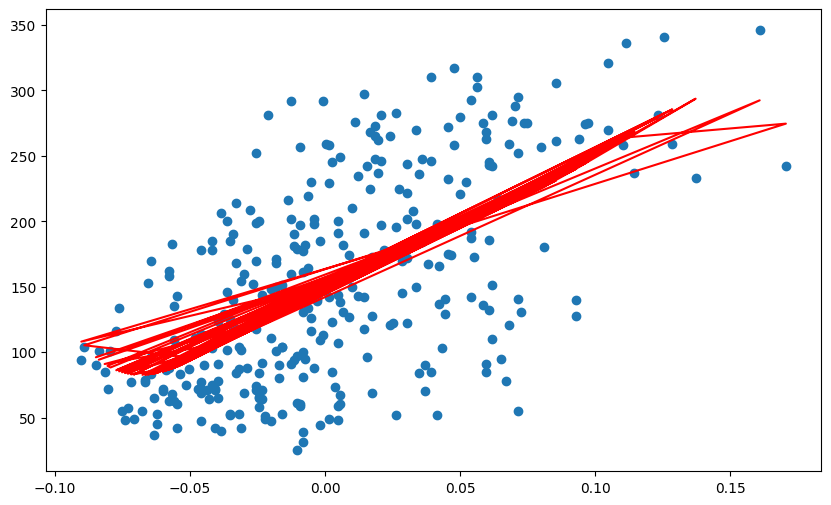

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#model 6 - degree=5

BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

#print(len(BMI_train), len(BMI_val), len(BMI_test))
#print(len(y_train), len(y_val),len(y_test))

BMI_train_transformed = np.array(BMI_train)
#print(BMI_train_transformed.shape)

BMI_val_transformed = np.array(BMI_val)
#print(BMI_val_transformed.shape)

BMI_test_transformed = np.array(BMI_test)
#print(BMI_test_transformed.shape)

#BMI_val = np.array(BMI_val)

#print(BMI_val.shape)
#print(BMI_train_transformed)
#print(y_train)


poly = PolynomialFeatures(degree=5, include_bias=False)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=5")
print("Training")

poly_features = poly.fit_transform(BMI_train_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_train)
#print(poly_reg_model)


preds_valid_train  = poly_reg_model.predict(poly_features)

plt.figure(figsize=(10,6))
plt.scatter(BMI_train_transformed, y_train)
plt.plot(BMI_train_transformed, preds_valid_train, c="red")

plt.show()

degree=5
Train


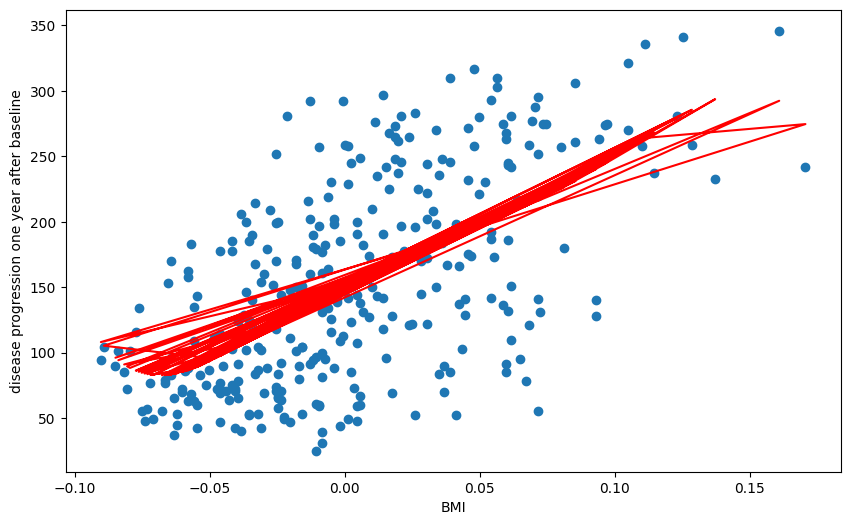

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#model 6 - degree=5

BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

BMI_train_transformed = np.array(BMI_train)

BMI_val_transformed = np.array(BMI_val)

BMI_test_transformed = np.array(BMI_test)

poly = PolynomialFeatures(degree=5, include_bias=False)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=5")
print("Train")

poly_features = poly.fit_transform(BMI_train_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_train)
#print(poly_reg_model)

preds_valid_train  = poly_reg_model.predict(poly_features)

plt.figure(figsize=(10,6))
plt.scatter(BMI_train_transformed, y_train)
plt.plot(BMI_train_transformed, preds_valid_train, c="red")

plt.xlabel("BMI")
plt.ylabel("disease progression one year after baseline")

plt.show()

degree=5
Validation


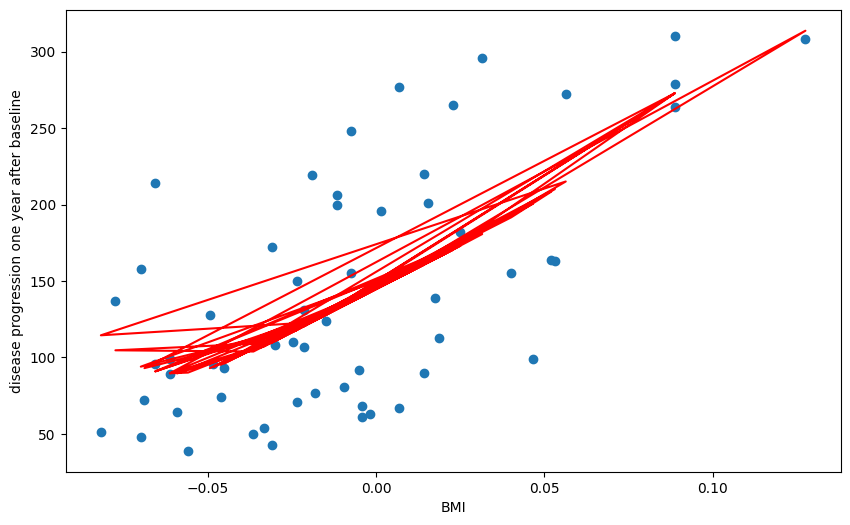

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#model 6 - degree=5

BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

BMI_train_transformed = np.array(BMI_train)

BMI_val_transformed = np.array(BMI_val)

BMI_test_transformed = np.array(BMI_test)

poly = PolynomialFeatures(degree=5, include_bias=False)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=5")
print("Validation")

poly_features = poly.fit_transform(BMI_val_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_val)
#print(poly_reg_model)

preds_valid_val  = poly_reg_model.predict(poly_features)

plt.figure(figsize=(10,6))
plt.scatter(BMI_val_transformed, y_val)
plt.plot(BMI_val_transformed, preds_valid_val, c="red")

plt.xlabel("BMI")
plt.ylabel("disease progression one year after baseline")

plt.show()

degree=5
Test


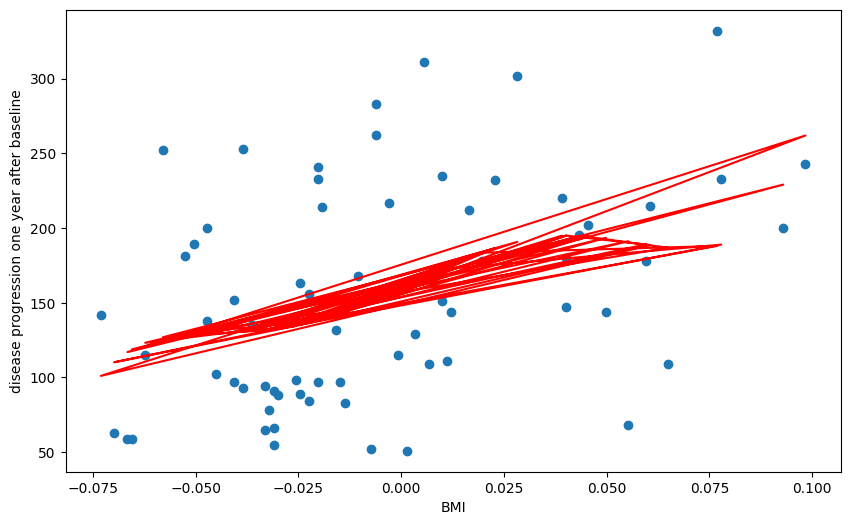

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#model 6 - degree=5

BMI_train = []
BMI_val = []
BMI_test = []

for x in range(len(X_train)):
  BMI_train.append(X_train[x][2])

for x in range(len(X_val)):
  BMI_val.append(X_val[x][2])

for x in range(len(X_test)):
  BMI_test.append(X_test[x][2])

BMI_train_transformed = np.array(BMI_train)

BMI_val_transformed = np.array(BMI_val)

BMI_test_transformed = np.array(BMI_test)

poly = PolynomialFeatures(degree=5, include_bias=False)
#print(poly)

poly_reg_model = LinearRegression()
#print(poly_reg_model)

print("degree=5")
print("Test")

poly_features = poly.fit_transform(BMI_test_transformed.reshape(-1, 1))
#print(poly_features)

poly_reg_model.fit(poly_features, y_test)
#print(poly_reg_model)

preds_valid_test  = poly_reg_model.predict(poly_features)

plt.figure(figsize=(10,6))
plt.scatter(BMI_test_transformed, y_test)
plt.plot(BMI_test_transformed, preds_valid_test, c="red")

plt.xlabel("BMI")
plt.ylabel("disease progression one year after baseline")

plt.show()

# 7.2.3 Write down the equation of the best model (with a two decimal digit precision, assuming it's sufficient). Manually calculate the expected diabetes progression for a BMI value of your choice, and compare it to model.perdict() for that value

In [ ]:
print(poly_reg_model.coef_)
print(poly_reg_model.intercept_)

[ 1.28640962e+03  4.16819784e+03 -3.73213927e+05 -1.34103947e+06
  4.52235067e+07]
159.50151761658145


In [ ]:
def manual_calc(x):
  A = 1.28640962e+03
  B = 4.16819784e+03
  C = -3.73213927e+05
  D = -1.34103947e+06
  E = 4.52235067e+07

  Intercept = 159.50151761658145

  return A*(x)+B*(x**2)+C*(x**3)+D*(x**4)+E*(x**5)+Intercept, poly_reg_model.predict([[x, x**2, x**3, x**4, x**5]])

# x value shall be between -0.075 and 0.1
print(manual_calc(x=0.025))

#preds_sample_test  = poly_reg_model.predict([[0.025, 0.000625, 1.5625000000000004e-05 , 3.9062500000000007e-07 , 9.765625000000002e-09]]) # consectuive values are 0.025 ^ x (x=1,2,3...)
#print(preds_sample_test)

(188.3532064218549, array([188.35320636]))


# 7.3. How many trainable parameters are we fitting for each of the six models? Explain these values. One way is to use sklearn function get_feature_names_out()

In [ ]:
poly1.get_feature_names_out()

array(['1'], dtype=object)

In [ ]:
poly2.get_feature_names_out()

array(['x0'], dtype=object)

In [ ]:
poly3.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [ ]:
poly4.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3'], dtype=object)

In [ ]:
poly5.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [ ]:
poly6.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5'], dtype=object)